# This workbook is used to create the tables and figures for the evaluation results

In [435]:
import pickle
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import seaborn as sns

#read predictions
df = pd.read_json('disnet_high_predictions.json')


infile = open('triangulation_high_results.pkl','rb')
df1 = pickle.load(infile)
infile.close()

infile = open('triangulation_medium_results.pkl','rb')
df2 = pickle.load(infile)
infile.close()


# val_frames = [i[0] for i in df2.frame]


# print(df.filename[:5])

# df = df[df.filename.isin(val_frames)]
# print(len(df))
# val_frames[:5]

### Function to plot the distribution of detections

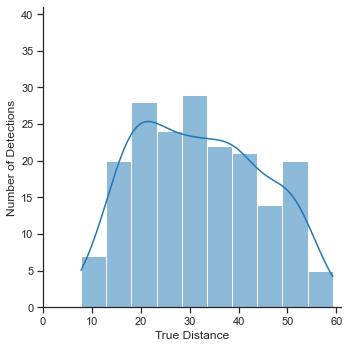

In [400]:
ax = sns.displot(df2.y_true, bins=10, kde=True, color='tab:blue')
ax.set(xlabel='True Distance',ylabel='Number of Detections')
ax.set(ylim=(0,41), xlim=(0,61))

### Errors for both classes

In [432]:

signs = df.loc[df.object_id == 0]
lights = df.loc[df.object_id == 1 ]


print('MAE signs:', MAE(df.y_true.loc[df.object_id == 0], df.y_pred[df.object_id == 0]))
print('MAE lights:', MAE(df.y_true.loc[df.object_id == 1], df.y_pred[df.object_id == 1]))

print('MAE both:', MAE(df.y_true, df.y_pred),'\n')

print('MSE signs:', MSE(df.y_true.loc[df.object_id == 0], df.y_pred[df.object_id == 0]))
print('MSE lights:', MSE(df.y_true.loc[df.object_id == 1], df.y_pred[df.object_id == 1]))
print('MSE both:', MSE(df.y_true, df.y_pred))

MAE signs: 24.153421052631575
MAE lights: 23.28268817204301
MAE both: 23.867279151943464 

MSE signs: 1125.482235263158
MSE lights: 886.8147903225807
MSE both: 1047.05088409894


### Proportion of objects within threshold

In [32]:
import numpy as np
THRESHOLD = 1.5


def delta(THRESHOLD, df):

    count = 0
    for i in range(len(df)):
        if abs(df.y_true.iloc[i] - df.y_pred.iloc[i]) < THRESHOLD:
            count += 1
    percentage = count/len(df)
    print(np.round(percentage*100,2), '% of object predictions are within', THRESHOLD, 'meters of true value.')
    


In [42]:
delta(THRESHOLD, signs)

33.82 % of object predictions are within 1.5 meters of true value.


## Plot the results at different intervals

* 1st: monodepth
* 2nd: triangulation
* 3rd: disnet

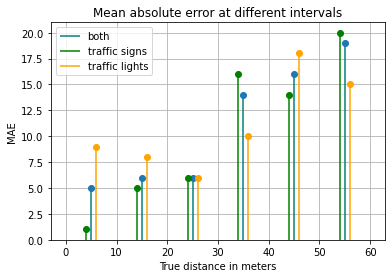

In [110]:
import matplotlib.pyplot as plt

errors = []
errors_light = []
errors_sign = []

df=df
signs  = df[df['object_id'] == 0]
lights = df[df['object_id'] == 1]

#all
for i in range(0,51,10):
    interval = df[(df.y_true >= i ) & (df.y_true < i+10)]
    
    y_pred = interval.y_pred
    err = np.round(MAE(interval.y_true, y_pred ))
    
    errors.append(err)

for i in range(0,51,10):
    interval = signs[(signs.y_true >= i ) & (signs.y_true < i+10)]
    
   
    y_pred = interval.y_pred
    
    err = np.round(MAE(interval.y_true, y_pred ))
    
    errors_sign.append(err)

for i in range(0,51,10):
    interval = lights[(lights.y_true >= i ) & (lights.y_true < i+10)]
    
   
    
    y_pred = interval.y_pred
    
    err = np.round(MAE(interval.y_true, y_pred ))
    
    errors_light.append(err)
      
    
fig, ax = plt.subplots()  
ax.vlines(range(5,56,10),ymax=errors,label ='both', color='teal', ymin=0)  
ax.plot(range(5,56,10),errors,'o')  

ax.vlines(range(4,55,10),ymax=errors_sign, label ='traffic signs', color='green', ymin=0)
ax.plot(range(4,55,10),errors_sign,'o', color='green')  

ax.vlines(range(6,57,10),ymax=errors_light, label ='traffic lights',color='orange', ymin=0)
ax.plot(range(6,57,10),errors_light,'o', color='orange')  

ax.grid(True)
ax.xaxis.set_data_interval(0 , 60)
ax.set_ylim(0)

plt.title('Mean absolute error at different intervals')
plt.xlabel('True distance in meters')
plt.ylabel('MAE')
plt.legend()
plt.savefig('monodepthMAE.png')
plt.show()

## Create boxplot

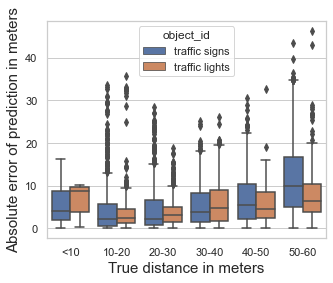

In [436]:
# change labels
df.loc[(df.object_id == 0),'object_id'] = 'traffic signs'
df.loc[(df.object_id == 1), 'object_id'] = 'traffic lights'

sns.set_theme(style="whitegrid")


df=df

#create bins
bins  = []
for i in df.y_true:
    if i < 10:
        bins.append('<10')
    if i >= 10 and i < 20:
        bins.append('10-20')
    if i >=20 and i<30:
        bins.append('20-30')
    if i >=30 and i<40:
        bins.append('30-40')
    if i >=40 and i<50:
        bins.append('40-50')
    if i >= 50 and i<60:
        bins.append('50-60')
        
        
df['bins'] = bins

#calculate absolute error
mae=[]
for index,val in enumerate(df.y_true):
    mae.append(abs(val - df.y_pred.iloc[index]))
df['mae'] = mae    
  
#boxplot    
boxes = sns.boxplot(x='bins', y='mae', data=df, order=['<10','10-20','20-30','30-40','40-50','50-60'],hue='object_id')
# boxes.set(ylim=(0,40))

#plt.title('Predicted values at different intervals')
plt.ylabel('Absolute error of prediction in meters', fontsize=15)
plt.xlabel('True distance in meters', fontsize=15)
plt.show()
